In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "AppleGothic"   # "Malgun Gothic"
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv("vibration_ml_data(utf8).csv", encoding = "utf8")
df

,dt,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS,Label
0,2020-11-25 14:09:51,-0.026132,0.021607,-2.367838e-07,0.000189,-0.026132,0.000046,0.006768,0.047738,-0.004572,0.004710,0.009282,-0.018496,0.018633,0.006768,정상
1,2020-11-25 14:09:57,-0.026030,0.024427,1.975752e-05,0.000052,-0.026030,0.000046,0.006775,0.050457,-0.004589,0.004816,0.009405,-0.018696,0.018923,0.006775,정상
2,2020-11-25 14:10:06,-0.024434,0.023554,1.652153e-05,0.000091,0.007556,0.000045,0.006673,0.047987,-0.004512,0.004640,0.009152,-0.018240,0.018367,0.006673,정상
3,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,정상
4,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,2020-12-25 12:22:46,-0.024946,0.027159,-7.708980e-06,0.000120,-0.006020,0.000050,0.007059,0.052105,-0.004785,0.004839,0.009625,-0.019222,0.019277,0.007059,베어링불량
29086,2020-12-25 12:22:49,-0.026202,0.021855,-3.729141e-06,0.000010,-0.005516,0.000047,0.006871,0.048058,-0.004659,0.004728,0.009387,-0.018740,0.018809,0.006871,베어링불량
29087,2020-12-25 12:22:52,-0.022930,0.022963,-1.704412e-05,0.000125,0.000240,0.000048,0.006936,0.045893,-0.004702,0.004812,0.009514,-0.018973,0.019082,0.006936,베어링불량
29088,2020-12-25 12:22:55,-0.024193,0.024598,1.033988e-05,0.000069,0.005363,0.000051,0.007139,0.048791,-0.004814,0.005003,0.009817,-0.019539,0.019729,0.007139,베어링불량


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29090 entries, 0 to 29089
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt        29090 non-null  object 
 1   min_v     29090 non-null  float64
 2   max_v     29090 non-null  float64
 3   mean_v    29090 non-null  float64
 4   median_v  29090 non-null  float64
 5   mode_V    29090 non-null  float64
 6   var_v     29090 non-null  float64
 7   std_v     29090 non-null  float64
 8   range_v   29090 non-null  float64
 9   Q1        29090 non-null  float64
 10  Q3        29090 non-null  float64
 11  IQR       29090 non-null  float64
 12  LB        29090 non-null  float64
 13  UB        29090 non-null  float64
 14  RMS       29090 non-null  float64
 15  Label     29090 non-null  object 
dtypes: float64(14), object(2)
memory usage: 3.6+ MB


In [6]:
df.describe()

,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS
count,29090.000000,29090.000000,2.909000e+04,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000,29090.000000
mean,-0.025372,0.024789,-6.221542e-07,0.000067,-0.008170,0.000048,0.006931,0.050162,-0.004692,0.004759,0.009451,-0.018868,0.018935,0.006931
std,0.001575,0.001712,1.080395e-05,0.000055,0.011428,0.000002,0.000166,0.002457,0.000134,0.000127,0.000251,0.000507,0.000500,0.000166
min,-0.049319,0.019336,-6.631567e-05,-0.000173,-0.033473,0.000041,0.006406,0.042133,-0.005197,0.000032,0.000065,-0.020749,0.000129,0.006406
25%,-0.026307,0.023597,-8.350428e-06,0.000031,-0.016999,0.000046,0.006795,0.048466,-0.004784,0.004672,0.009274,-0.019217,0.018584,0.006795
50%,-0.025218,0.024659,-5.615756e-07,0.000068,-0.006162,0.000048,0.006949,0.050030,-0.004702,0.004767,0.009473,-0.018911,0.018976,0.006949
75%,-0.024268,0.025838,7.145305e-06,0.000104,0.000468,0.000050,0.007052,0.051692,-0.004599,0.004844,0.009623,-0.018510,0.019276,0.007052
max,-0.020885,0.053734,1.347263e-04,0.000313,0.023062,0.000055,0.007400,0.103053,-0.000029,0.005242,0.010368,-0.000131,0.020724,0.007400


<AxesSubplot:xlabel='mean_v', ylabel='Count'>

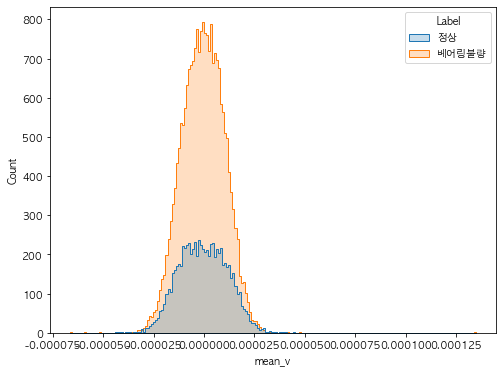

In [13]:
sns.histplot(data = df, x = df['mean_v'], hue = df['Label'], element = "step")

<AxesSubplot:xlabel='mean_v', ylabel='Density'>

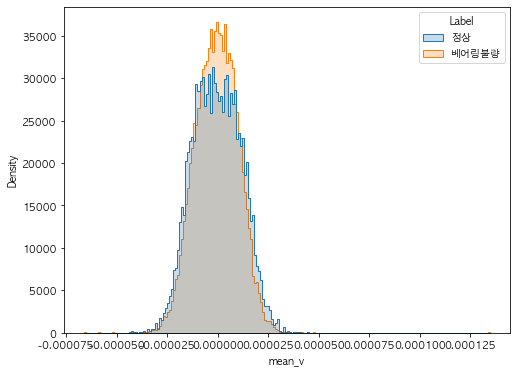

In [12]:
sns.histplot(data = df, x = df['mean_v'], hue = df['Label'], element = "step", stat="density", common_norm = False)

In [8]:
df.groupby("Label").count()

,dt,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS
Label,,,,,,,,,,,,,,,
베어링불량,21557,21557,21557,21557,21557,21557,21557,21557,21557,21557,21557,21557,21557,21557,21557
정상,7533,7533,7533,7533,7533,7533,7533,7533,7533,7533,7533,7533,7533,7533,7533


<AxesSubplot:xlabel='RMS', ylabel='Density'>

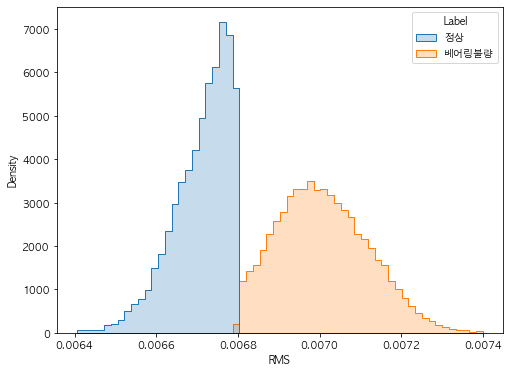

In [14]:
sns.histplot(data = df, x = df['RMS'], hue = df['Label'], element = "step", stat="density", common_norm = False)

<AxesSubplot:xlabel='IQR', ylabel='Density'>

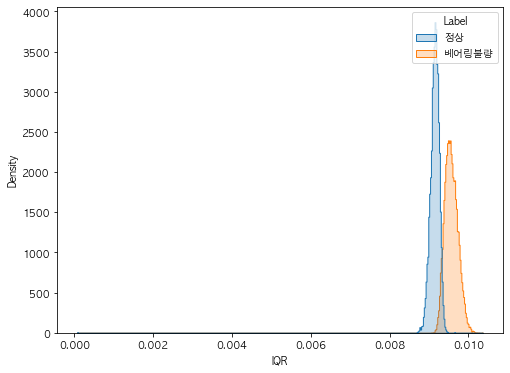

In [15]:
sns.histplot(data = df, x = df['IQR'], hue = df['Label'], element = "step", stat="density", common_norm = False)

<AxesSubplot:>

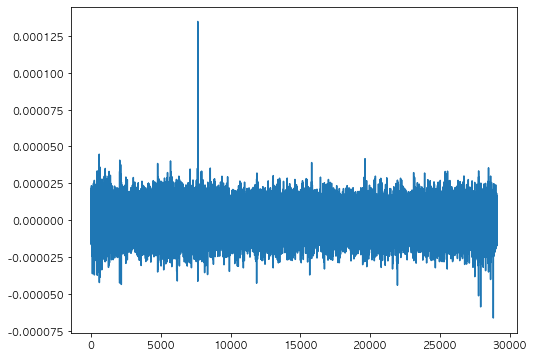

In [16]:
df['mean_v'].plot()

<AxesSubplot:>

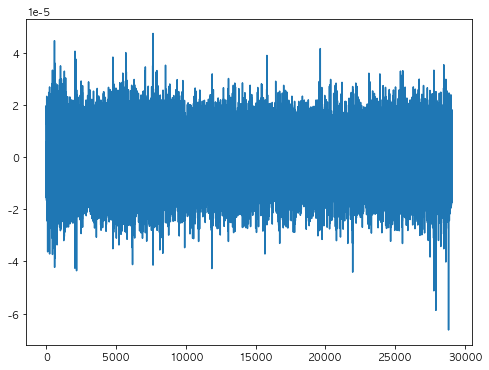

In [18]:
df2 = df[df['mean_v'] < 0.000125]
df2['mean_v'].plot()

<AxesSubplot:>

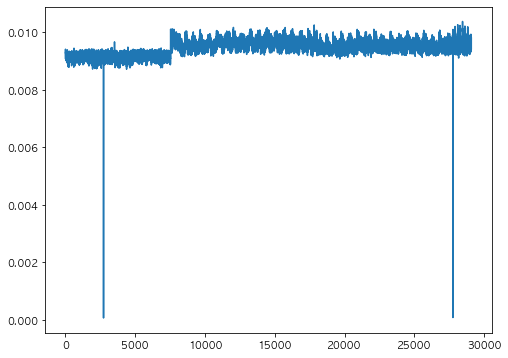

In [20]:
df2['IQR'].plot()

<AxesSubplot:>

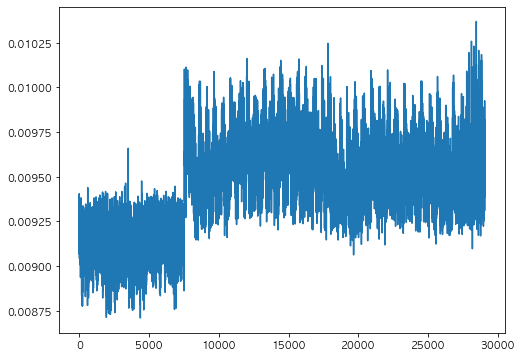

In [21]:
df3 = df2[df2['IQR'] > 0.002]
df3['IQR'].plot()

<AxesSubplot:ylabel='IQR'>

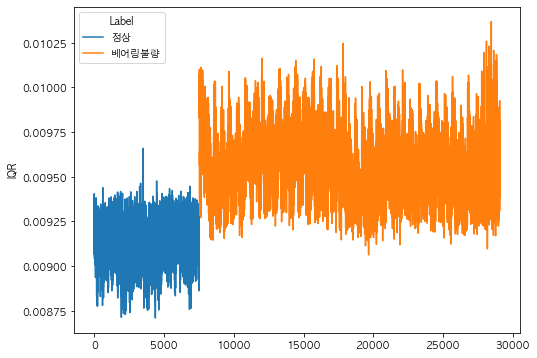

In [25]:
sns.lineplot(data = df3, x = df3.index, y = 'IQR', hue = 'Label')

<AxesSubplot:xlabel='IQR', ylabel='Density'>

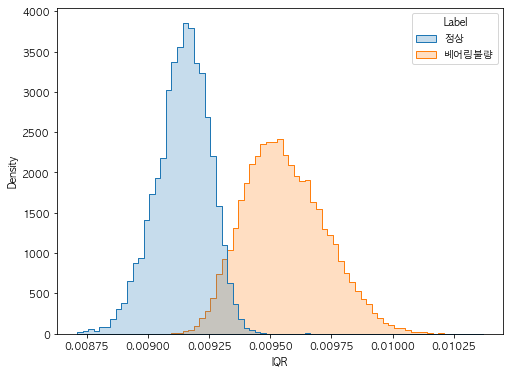

In [28]:
sns.histplot(data = df3, x = 'IQR', hue = 'Label', element = "step", stat="density", common_norm = False)

In [33]:
from scipy.stats import ttest_ind

ttest_result = ttest_ind(df3[df3['Label']=='정상']['IQR'], df3[df3['Label']=='베어링불량']['IQR'], equal_var = True)
print("검정통계량(t-value) :", ttest_result.statistic)
print("유의확률(p-value) :", ttest_result.pvalue)

검정통계량(t-value) : -205.78959917884754
유의확률(p-value) : 0.0


In [34]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(df3['Label'])
df3['Label_le'] = le.transform(df3['Label'])

df3

/opt/anaconda3/envs/oss/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,dt,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS,Label,Label_le
0,2020-11-25 14:09:51,-0.026132,0.021607,-2.367838e-07,0.000189,-0.026132,0.000046,0.006768,0.047738,-0.004572,0.004710,0.009282,-0.018496,0.018633,0.006768,정상,1
1,2020-11-25 14:09:57,-0.026030,0.024427,1.975752e-05,0.000052,-0.026030,0.000046,0.006775,0.050457,-0.004589,0.004816,0.009405,-0.018696,0.018923,0.006775,정상,1
2,2020-11-25 14:10:06,-0.024434,0.023554,1.652153e-05,0.000091,0.007556,0.000045,0.006673,0.047987,-0.004512,0.004640,0.009152,-0.018240,0.018367,0.006673,정상,1
3,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,정상,1
4,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,정상,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,2020-12-25 12:22:46,-0.024946,0.027159,-7.708980e-06,0.000120,-0.006020,0.000050,0.007059,0.052105,-0.004785,0.004839,0.009625,-0.019222,0.019277,0.007059,베어링불량,0
29086,2020-12-25 12:22:49,-0.026202,0.021855,-3.729141e-06,0.000010,-0.005516,0.000047,0.006871,0.048058,-0.004659,0.004728,0.009387,-0.018740,0.018809,0.006871,베어링불량,0
29087,2020-12-25 12:22:52,-0.022930,0.022963,-1.704412e-05,0.000125,0.000240,0.000048,0.006936,0.045893,-0.004702,0.004812,0.009514,-0.018973,0.019082,0.006936,베어링불량,0
29088,2020-12-25 12:22:55,-0.024193,0.024598,1.033988e-05,0.000069,0.005363,0.000051,0.007139,0.048791,-0.004814,0.005003,0.009817,-0.019539,0.019729,0.007139,베어링불량,0


In [37]:
del df3['dt'], df3['Label']

df3.columns

Index(['min_v', 'max_v', 'mean_v', 'median_v', 'mode_V', 'var_v', 'std_v',
       'range_v', 'Q1', 'Q3', 'IQR', 'LB', 'UB', 'RMS', 'Label_le'],
      dtype='object')

In [38]:
label_df = df3["Label_le"]
feature_df = df3.drop("Label_le", axis = 1)

In [40]:
feature_df.columns

Index(['min_v', 'max_v', 'mean_v', 'median_v', 'mode_V', 'var_v', 'std_v',
       'range_v', 'Q1', 'Q3', 'IQR', 'LB', 'UB', 'RMS'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size = 0.2, random_state = 10)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23269 entries, 5272 to 17675
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   min_v     23269 non-null  float64
 1   max_v     23269 non-null  float64
 2   mean_v    23269 non-null  float64
 3   median_v  23269 non-null  float64
 4   mode_V    23269 non-null  float64
 5   var_v     23269 non-null  float64
 6   std_v     23269 non-null  float64
 7   range_v   23269 non-null  float64
 8   Q1        23269 non-null  float64
 9   Q3        23269 non-null  float64
 10  IQR       23269 non-null  float64
 11  LB        23269 non-null  float64
 12  UB        23269 non-null  float64
 13  RMS       23269 non-null  float64
dtypes: float64(14)
memory usage: 2.7 MB


In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818 entries, 13174 to 24728
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   min_v     5818 non-null   float64
 1   max_v     5818 non-null   float64
 2   mean_v    5818 non-null   float64
 3   median_v  5818 non-null   float64
 4   mode_V    5818 non-null   float64
 5   var_v     5818 non-null   float64
 6   std_v     5818 non-null   float64
 7   range_v   5818 non-null   float64
 8   Q1        5818 non-null   float64
 9   Q3        5818 non-null   float64
 10  IQR       5818 non-null   float64
 11  LB        5818 non-null   float64
 12  UB        5818 non-null   float64
 13  RMS       5818 non-null   float64
dtypes: float64(14)
memory usage: 681.8 KB


In [72]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
# 베어링불량 : 21557, 정상 : 7533

In [74]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 10)

X_resampled, y_resampled = sm.fit_resample(X_train, list(y_train))

In [75]:
total = len(y_resampled)
normal_count = sum(y_resampled)
abnor_count = total - abnormal_count

print("정상:",normal_count)
print("베어링불량:",abnor_count)

정상: 17274
베어링불량: 17274


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()

lr_clf = lr_clf.fit(X_resampled, y_resampled)
lr_pred = lr_clf.predict(X_test)

print(accuracy_score(y_test, lr_pred))

0.6785837057408044


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion_m = confusion_matrix(y_test, pred, labels = [1, 0])
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print("Confusion Matrix \n", confusion_m)
    print("정확도:", accuracy)
    print("정밀도:", precision)
    print("재현율:", recall)
    print("F1-score:", f1)

get_clf_eval(y_test, lr_pred)

Confusion Matrix 
 [[1074  463]
 [1407 2874]]
정확도: 0.6785837057408044
정밀도: 0.4328899637243047
재현율: 0.6987638256343527
F1-score: 0.5345943255350921


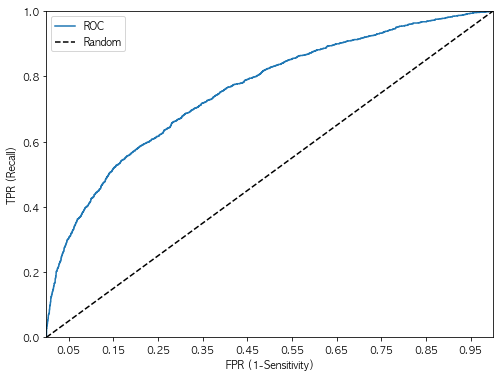

In [101]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_cl):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_cl)
    
    plt.plot(fprs, tprs, label = 'ROC')
    
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("FPR (1-Sensitivity)")
    plt.ylabel("TPR (Recall)")
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [79]:
X_resampled.columns

Index(['min_v', 'max_v', 'mean_v', 'median_v', 'mode_V', 'var_v', 'std_v',
       'range_v', 'Q1', 'Q3', 'IQR', 'LB', 'UB', 'RMS'],
      dtype='object')

In [118]:
X_resampled_IQR = X_resampled[['LB','UB']]
X_test_IQR = X_test[['LB','UB']]

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lr_clf_IQR = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = DecisionTreeClassifier()

lr_clf_IQR = lr_clf_IQR.fit(X_resampled_IQR, y_resampled)
lr_pred_IQR = lr_clf_IQR.predict(X_test_IQR)

dt_clf = dt_clf.fit(X_resampled_IQR, y_resampled)
dt_pred_IQR = dt_clf.predict(X_test_IQR)

rf_clf = rf_clf.fit(X_resampled_IQR, y_resampled)
rf_pred_IQR = rf_clf.predict(X_test_IQR)


print(accuracy_score(y_test, lr_pred_IQR))
print(accuracy_score(y_test, dt_pred_IQR))
print(accuracy_score(y_test, rf_pred_IQR))

0.930904090752836
0.9388105878308697
0.9382949467170849


In [120]:
get_clf_eval(y_test, lr_pred_IQR)

Confusion Matrix 
 [[1519   18]
 [ 384 3897]]
정확도: 0.930904090752836
정밀도: 0.7982133473462953
재현율: 0.9882888744307091
F1-score: 0.8831395348837209


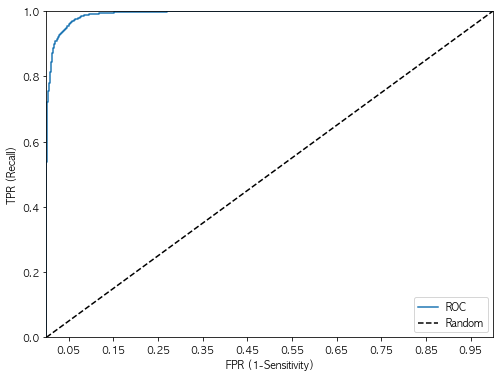

In [121]:
roc_curve_plot(y_test, lr_clf_IQR.predict_proba(X_test_IQR)[:,1])